<a href="https://colab.research.google.com/github/Frazanhibriz/Machine-Learning/blob/main/Feature%20Engineering%20%26%20Preprocessing%20Data/FDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [25]:
url = "https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/refs/heads/main/dataset-penugasan/FDC.csv"

df = pd.read_csv(url)

df.head(10)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137
8,3.3,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180
9,3.3,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,...,1.0,1.0,4,580.0,345,field hockey,5,1,900,125


In [26]:
df.shape

(125, 61)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

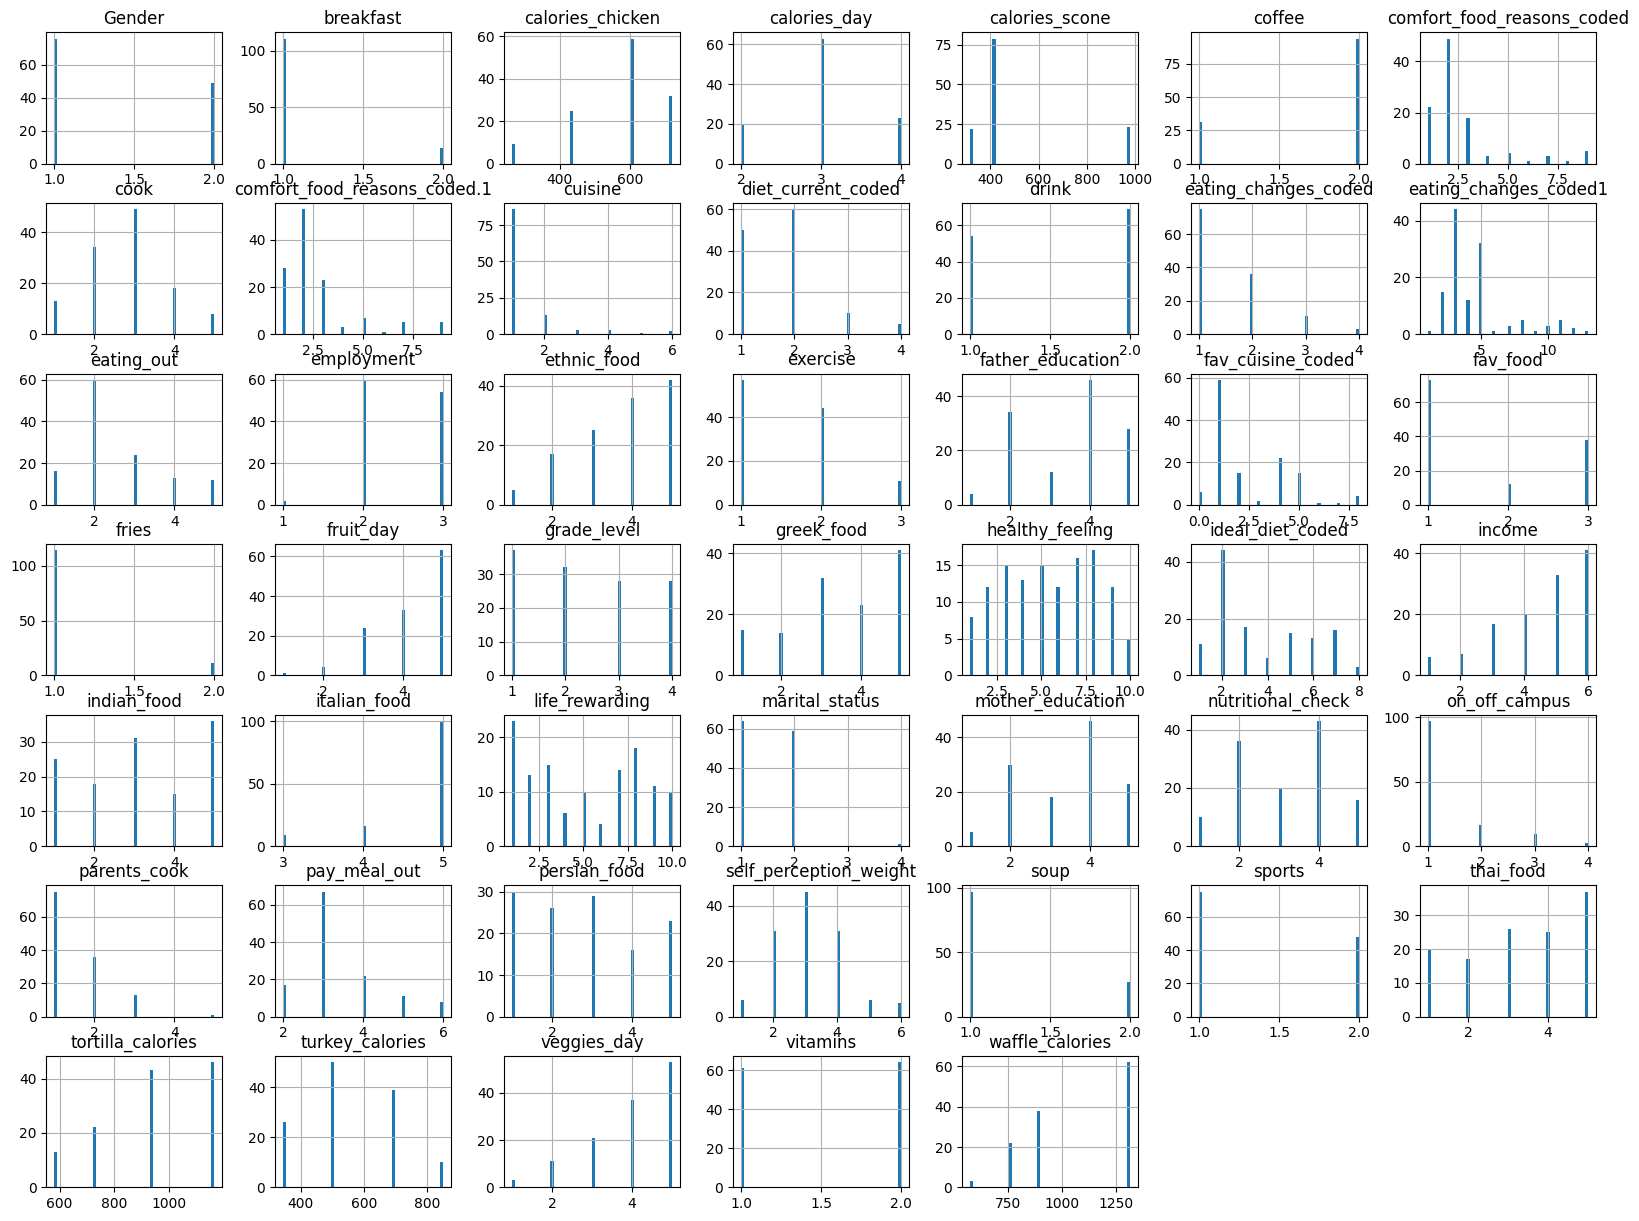

In [28]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [29]:
df.isnull().sum()

,0
GPA,2
Gender,0
breakfast,0
calories_chicken,0
calories_day,19
...,...
type_sports,26
veggies_day,0
vitamins,0
waffle_calories,0


In [30]:
# Mengganti nilai null dengan nilai arbiter untuk setiap kolom
for column in df.columns:
    # Periksa tipe data kolom
    if df[column].dtype == 'object':
        # Jika tipe data object (string), isi nilai null dengan 'KOSONG'
        df[column] = df[column].fillna('MISSING')
    else:
        # Jika tipe data numerik, isi nilai null dengan 0
        df[column] = df[column].fillna(9999)


df.isnull().sum()


,0
GPA,0
Gender,0
breakfast,0
calories_chicken,0
calories_day,0
...,...
type_sports,0
veggies_day,0
vitamins,0
waffle_calories,0


In [31]:
df.duplicated().sum()

0

In [32]:
cols_to_remove = ['GPA', 'father_profession', 'mother_profession', 'marital_status', 'on_off_campus']
df.drop(cols_to_remove, axis=1, inplace=True)

df.head()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2,1,430,9999.0,315.0,1,none,we dont have comfort,9.0,2.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,...,1.0,2.0,5,725.0,690,MISSING,3,1,1315,"Not sure, 240"
4,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [33]:
df.head()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2,1,430,9999.0,315.0,1,none,we dont have comfort,9.0,2.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,...,1.0,2.0,5,725.0,690,MISSING,3,1,1315,"Not sure, 240"
4,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        125 non-null    int64  
 1   breakfast                     125 non-null    int64  
 2   calories_chicken              125 non-null    int64  
 3   calories_day                  125 non-null    float64
 4   calories_scone                125 non-null    float64
 5   coffee                        125 non-null    int64  
 6   comfort_food                  125 non-null    object 
 7   comfort_food_reasons          125 non-null    object 
 8   comfort_food_reasons_coded    125 non-null    float64
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [35]:
df['weight'] = df['weight'].str.replace("I'm not answering this.", '0')
df['weight'] = df['weight'].str.replace('Not sure,', '')
df['weight'] = df['weight'].str.replace('lbs', '')

In [36]:
df['weight'] = df['weight'].str.replace('MISSING', '0')
df['weight'] = pd.to_numeric(df['weight'], errors='coerce').fillna(0).astype(int) # Using to_numeric and errors='coerce' will convert any invalid value to NaN. Then NaN will be filled by 0

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        125 non-null    int64  
 1   breakfast                     125 non-null    int64  
 2   calories_chicken              125 non-null    int64  
 3   calories_day                  125 non-null    float64
 4   calories_scone                125 non-null    float64
 5   coffee                        125 non-null    int64  
 6   comfort_food                  125 non-null    object 
 7   comfort_food_reasons          125 non-null    object 
 8   comfort_food_reasons_coded    125 non-null    float64
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [38]:
df['comfort_food'] = df['comfort_food'].str.split().str[0]
df['food_childhood'] = df['food_childhood'].str.split().str[0]
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.upper()
df['comfort_food'] = df['comfort_food'].str.replace(',', '')
df.head(10)

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2,1,430,9999.0,315.0,1,NONE,WE DONT HAVE COMFORT,9.0,2.0,...,1.0,1.0,1,1165.0,345,CAR RACING,5,1,1315,187
1,1,1,610,3.0,420.0,2,CHOCOLATE,"STRESS, BORED, ANGER",1.0,3.0,...,1.0,1.0,2,725.0,690,BASKETBALL,4,2,900,155
2,1,1,720,4.0,420.0,2,FROZEN,"STRESS, SADNESS",1.0,1.0,...,1.0,2.0,5,1165.0,500,NONE,5,1,900,0
3,1,1,430,3.0,420.0,2,PIZZA,BOREDOM,2.0,2.0,...,1.0,2.0,5,725.0,690,MISSING,3,1,1315,240
4,1,1,720,2.0,420.0,2,ICE,"STRESS, BOREDOM, CRAVINGS",1.0,1.0,...,1.0,1.0,4,940.0,500,SOFTBALL,4,2,760,190
5,1,1,610,3.0,980.0,2,CANDY,"NONE, I DON'T EAT COMFORT FOOD. I JUST EAT WHE...",4.0,3.0,...,1.0,2.0,4,940.0,345,NONE.,1,2,1315,190
6,2,1,610,3.0,420.0,2,CHOCOLATE,"STRESS, BOREDOM",1.0,2.0,...,1.0,1.0,5,940.0,690,SOCCER,4,1,1315,180
7,1,1,720,3.0,420.0,1,ICE,I EAT COMFORT FOOD WHEN IM STRESSED OUT FROM S...,1.0,3.0,...,1.0,2.0,1,725.0,500,NONE,4,2,1315,137
8,1,1,430,9999.0,420.0,1,DONUTS,BOREDOM,2.0,3.0,...,2.0,2.0,5,725.0,345,NONE,3,2,760,180
9,1,1,430,3.0,315.0,2,MAC,"STRESS, ANGER AND SADNESS",1.0,3.0,...,1.0,1.0,4,580.0,345,FIELD HOCKEY,5,1,900,125


In [39]:
df['comfort_food_reasons'] = df['comfort_food_reasons'].str.split().str[0]
df['comfort_food_reasons'] = df['comfort_food_reasons'].str.replace(',', '')
df.head(10)

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2,1,430,9999.0,315.0,1,NONE,WE,9.0,2.0,...,1.0,1.0,1,1165.0,345,CAR RACING,5,1,1315,187
1,1,1,610,3.0,420.0,2,CHOCOLATE,STRESS,1.0,3.0,...,1.0,1.0,2,725.0,690,BASKETBALL,4,2,900,155
2,1,1,720,4.0,420.0,2,FROZEN,STRESS,1.0,1.0,...,1.0,2.0,5,1165.0,500,NONE,5,1,900,0
3,1,1,430,3.0,420.0,2,PIZZA,BOREDOM,2.0,2.0,...,1.0,2.0,5,725.0,690,MISSING,3,1,1315,240
4,1,1,720,2.0,420.0,2,ICE,STRESS,1.0,1.0,...,1.0,1.0,4,940.0,500,SOFTBALL,4,2,760,190
5,1,1,610,3.0,980.0,2,CANDY,NONE,4.0,3.0,...,1.0,2.0,4,940.0,345,NONE.,1,2,1315,190
6,2,1,610,3.0,420.0,2,CHOCOLATE,STRESS,1.0,2.0,...,1.0,1.0,5,940.0,690,SOCCER,4,1,1315,180
7,1,1,720,3.0,420.0,1,ICE,I,1.0,3.0,...,1.0,2.0,1,725.0,500,NONE,4,2,1315,137
8,1,1,430,9999.0,420.0,1,DONUTS,BOREDOM,2.0,3.0,...,2.0,2.0,5,725.0,345,NONE,3,2,760,180
9,1,1,430,3.0,315.0,2,MAC,STRESS,1.0,3.0,...,1.0,1.0,4,580.0,345,FIELD HOCKEY,5,1,900,125


In [40]:
df['type_sports'] = df['type_sports'].str.split().str[0]
df['fav_cuisine'] = df['fav_cuisine'].str.split().str[0]
df['comfort_food'] = df['comfort_food'].str.replace(',', '')
df.head()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2,1,430,9999.0,315.0,1,NONE,WE,9.0,2.0,...,1.0,1.0,1,1165.0,345,CAR,5,1,1315,187
1,1,1,610,3.0,420.0,2,CHOCOLATE,STRESS,1.0,3.0,...,1.0,1.0,2,725.0,690,BASKETBALL,4,2,900,155
2,1,1,720,4.0,420.0,2,FROZEN,STRESS,1.0,1.0,...,1.0,2.0,5,1165.0,500,NONE,5,1,900,0
3,1,1,430,3.0,420.0,2,PIZZA,BOREDOM,2.0,2.0,...,1.0,2.0,5,725.0,690,MISSING,3,1,1315,240
4,1,1,720,2.0,420.0,2,ICE,STRESS,1.0,1.0,...,1.0,1.0,4,940.0,500,SOFTBALL,4,2,760,190


In [41]:
# Definisikan fungsi untuk frequency encoding
def frequency_encoding(df, columns):
    for col in columns:
        # Menghitung frekuensi setiap nilai unik
        freq_map = df[col].value_counts(normalize=True).to_dict()

        # Mengganti nilai dengan frekuensinya
        df[col] = df[col].map(freq_map)

    return df

# Tentukan kolom yang akan di-encode
# Remove the leading tab characters from 'healthy_meal' and 'ideal_diet'
categorical_cols = ['diet_current', 'eating_changes', 'healthy_meal', 'ideal_diet', 'meals_dinner_friend', 'comfort_food', 'comfort_food_reasons', 'fav_cuisine', 'food_childhood', 'type_sports']

# Terapkan frequency encoding
df = frequency_encoding(df.copy(), categorical_cols)

# Menampilkan DataFrame yang sudah di-encode
df.head()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2,1,430,9999.0,315.0,1,0.008,0.008,9.0,2.0,...,1.0,1.0,1,1165.0,345,0.008,5,1,1315,187
1,1,1,610,3.0,420.0,2,0.136,0.184,1.0,3.0,...,1.0,1.0,2,725.0,690,0.032,4,2,900,155
2,1,1,720,4.0,420.0,2,0.008,0.184,1.0,1.0,...,1.0,2.0,5,1165.0,500,0.104,5,1,900,0
3,1,1,430,3.0,420.0,2,0.136,0.336,2.0,2.0,...,1.0,2.0,5,725.0,690,0.208,3,1,1315,240
4,1,1,720,2.0,420.0,2,0.112,0.184,1.0,1.0,...,1.0,1.0,4,940.0,500,0.072,4,2,760,190


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        125 non-null    int64  
 1   breakfast                     125 non-null    int64  
 2   calories_chicken              125 non-null    int64  
 3   calories_day                  125 non-null    float64
 4   calories_scone                125 non-null    float64
 5   coffee                        125 non-null    int64  
 6   comfort_food                  125 non-null    float64
 7   comfort_food_reasons          125 non-null    float64
 8   comfort_food_reasons_coded    125 non-null    float64
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    float64
 13  diet_

In [43]:
df.shape

(125, 56)

In [21]:
# Split data into training and testing sets
X = df.drop('weight', axis=1)
y = df['weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 55), (25, 55), (100,), (25,))